# Data Exploration

#I have worked on a movie data which contains 10867 rows and 21 columns collected from
The Movie Database (TMDb).
The data contains information like genre of movies, director, run time, budget, revenue earned etc.
It is a vast data and there are many variables that are unusable , for example Adjusted budget and Adjusted revenue . Therefore I have taken normal budget and revenue to make analysis.

In order to present my analysis I have taken only 3 variables as there are many variables like "keywords, genre which contains multiple words making the analysis a bit complicated .
Therefore I have ignored them too.
I have also worked on two questions .
Please find further details in the project.

# Data Wrangling

### Gather
I have gathered the data from Kaggle.                                                                                                                                           

### Assess
Then I did a visual analysis of the data . I found out there are columns like keywords and genres  which contain more than one keyword making it impossible to use ;

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [18]:
data = pd.read_csv(r"C:\Users\Sudhir\Downloads\tmdb-movies.csv")
print(data.head(10))

       id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   
5  281957  tt1663202    9.110700  135000000   532950503   
6   87101  tt1340138    8.654359  155000000   440603537   
7  286217  tt3659388    7.667400  108000000   595380321   
8  211672  tt2293640    7.404165   74000000  1156730962   
9  150540  tt2096673    6.326804  175000000   853708609   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   
5                  The Revenant   
6            Terminator Genisys   
7                   The Martian   
8                       Minions   


## Clean
1)I have used "sort & filter" on the basis of revenue from largest to smallest. 

2)Then I have removed zero vales from the budget and revenue columns of our data set.
   

In [3]:
data.drop(data[ (data['budget'] == 0)&(data['revenue'] == 0)].index , inplace=True)

# How does "run time" affects the rating of a movie?

In [4]:
# run time from 60 minutes to 240 minutes has been considered in my evaluation
# I will divide the run time with a gap of 30minutes
# Relationship between the Run time and ratings will be evaluated with the help of graph
# Conclusion of above question will be provided basis  my findings
# All the codes used will be here in Jupyter notebook only

In [5]:
new_data = data[['runtime','vote_average','original_title']]

In [6]:
#I have selected only 3  columns which are relevant to the above question and I have created a new data frame.

In [7]:
new_data = new_data[(60<=new_data["runtime"])&(new_data["runtime"]<=240)]

In [8]:
print(len(new_data))

6123


In [9]:
#I have filtered the data on the basis of run time. Using the "and" operator between two conditions.
# Condition 1
    #- the run time should be greater than 60 minutes
    #- the run time should be less than 240 minutes

In [10]:
new_data["runtime_bin"] = pd.cut(new_data["runtime"],range(60, 241, 30))

In [11]:
#I have created a new "30 minutes interval" category columnn that is "runtime_bin" which will classify 
#the data into different categories. It will show the movies falling in respective time interval.

In [12]:
print(new_data)

       runtime  vote_average                original_title runtime_bin
0          124           6.5                Jurassic World  (120, 150]
1          120           7.1            Mad Max: Fury Road   (90, 120]
2          119           6.3                     Insurgent   (90, 120]
3          136           7.5  Star Wars: The Force Awakens  (120, 150]
4          137           7.3                     Furious 7  (120, 150]
...        ...           ...                           ...         ...
10835      182           7.0              The Sand Pebbles  (180, 210]
10841       82           5.5                  The Shooting    (60, 90]
10848      100           6.7              Fantastic Voyage   (90, 120]
10855       90           6.1       The Ghost & Mr. Chicken    (60, 90]
10865       74           1.5      Manos: The Hands of Fate    (60, 90]

[6123 rows x 4 columns]


<AxesSubplot:ylabel='runtime_bin'>

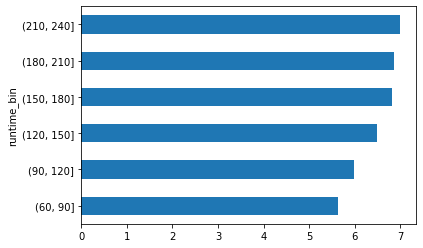

In [13]:
averages_by_bin = new_data.groupby("runtime_bin").vote_average.mean()
averages_by_bin.plot.barh()

In [14]:
#1)Now I have grouped our data bu run time mean.
#2)By this mean methoed, I have created a pandas series of average values of "vote_average"
#column for each group of data
#3)I have created a horizontal bar graph having runtime intervals on Y-axis and vote average on X-axis.
print(type(averages_by_bin))

<class 'pandas.core.series.Series'>


# Conclusion
1)Lesser ratings given to short movies

2)Duratin does not affect the ratings much

3)As per the data  maximum rating has been given to the movies which were between 210 minutes to 240 minutes (3-4 hours). This means longer duration movies has gained higher ratings .

4)On the basis of above conclusion I have also found some of my favourite movies like "Jodhaa Akbar"


# Dependency of profit/loss on director

In [15]:
#I have selected only 4 columns which are relevant to the above question and I have created a new data frame.

In [16]:
#data wrangling
#There are many missing values in the data

In [19]:
new_data = data[['budget','revenue','director','original_title','genres']]

In [ ]:
new_data['P/L'] = new_data.apply(lambda row: row.revenue - row.budget, axis=1)
print(new_data.head(200))

In [ ]:
print(len(new_data))

In [ ]:
# I have sorted the data frame by profit and loss.

In [ ]:
new_data.sort_values(by=['P/L'])

In [ ]:
new_group = new_data.groupby(['director'])

In [ ]:
dir = []
summ = []
for i,j in new_group:
    dir.append(i)
    summ.append(j['P/L'].sum())
data = {'director' : dir, 'pl' : summ}
df=pd.DataFrame.from_dict(data)

In [ ]:
print(len(dir))

In [ ]:
print(df[df.pl == df.pl.max()])

In [ ]:
print(df[df.pl == df.pl.min()])

In [ ]:
#Due to the large number of movies directed by Steven Spielberg, I have considered top 10 movies 
#with maximum profit.

In [ ]:
nd=new_data[new_data.director=='Steven Spielberg'].head(10)

In [ ]:
nd[['original_title','budget','revenue']].plot(x='original_title', 
        kind='bar', 
        stacked=False, 
        title='Revenue and Budget for movies by Steven Speilberg')

In [20]:
nd2=new_data[new_data.director=='Steven Spielberg']

In [21]:
genre=list(nd2['genres'].unique())

In [25]:
operation = lambda x:len(nd2[nd2['genres']==x])

new_list = list(map(operation, genre))

In [26]:
print(genre,new_list)

['Thriller|Drama', 'Science Fiction|Drama', 'Drama|Science Fiction|Adventure', 'Adventure|Action', 'Adventure|Animation|Action|Family|Mystery', 'Drama|War', 'Drama|Crime', 'Action|Thriller|Science Fiction|Mystery', 'Drama|History|Mystery', 'Adventure|Action|Science Fiction', 'Drama', 'Adventure|Thriller|Science Fiction', 'Drama|Action|History|Thriller', 'Comedy|Drama', 'Action|Comedy', 'Science Fiction|Adventure|Family|Fantasy', 'Drama|History|War', 'Fantasy|Drama|Romance', 'Adventure|Fantasy|Comedy|Family', 'Action|Crime|Drama', 'Horror|Thriller|Adventure', 'Horror|Action|Mystery|Thriller', 'Adventure|Science Fiction'] [1, 1, 1, 4, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1]


#Below given pie chart shows the 1d exploration of the different genres of movies made by Steven Speilberg 
I have included three variables in my data mentioned above 

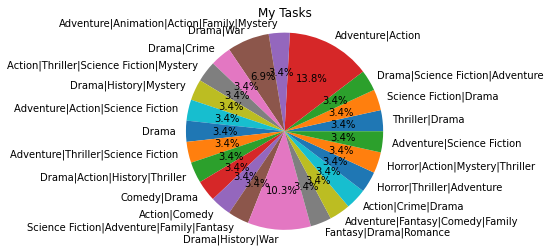

In [27]:
plt.pie(new_list,labels=genre,autopct='%1.1f%%')
plt.title('My Tasks')
plt.axis('equal')
plt.show()

In [ ]:
df[df.pl == df.pl.max()]['director']

In [ ]:
#I have grouped the data together by directors.
# I have created new data frame having two columns as director and net Profit/loss
#I have found out the directors who have earned Maximum profit and maximum loss.

#CONCLUSION

1) Steven Spielberg earned the Maximum profit of $7467063772

2) Sngmoo Lee suffered maximum loss of $413912431

#Limitations:
1)The data contains too many null values. Therefore, I have eliminated them in order to ascertain the answers for above mentioned questions.
2)Movies directed by the Steven Spienberg are large in number,Therefore I have considered only top 10 movies.

# Website used
1)stackoverflow
https://stackoverflow.com/
2)pandas
https://pandas.pydata.org/docs/
